In [ ]:
# !wget "https://mcauleylab.ucsd.edu/public_datasets/data/amazon_2023/raw/review_categories/Industrial_and_Scientific.jsonl.gz" -O "datasets/Industrial_and_Scientific.jsonl.gz"
# !wget "https://mcauleylab.ucsd.edu/public_datasets/data/amazon_2023/raw/review_categories/meta_Industrial_and_Scientific.jsonl.gz" -O "datasets/meta_Industrial_and_Scientific.jsonl.gz"
# !gzip -d "datasets/Industrial_and_Scientific.jsonl.gz"
# !gzip -d "datasets/meta_Industrial_and_Scientific.jsonl.gz"

In [ ]:
!wget "https://mcauleylab.ucsd.edu/public_datasets/data/amazon_2023/raw/review_categories/Kindle_Store.jsonl.gz" -O "../../data/Kindle_Store.jsonl.gz"
!wget "https://mcauleylab.ucsd.edu/public_datasets/data/amazon_2023/raw/meta_categories/meta_Kindle_Store.jsonl.gz" -O "../../data/meta_Kindle_Store.jsonl.gz"

fhttps://mcauleylab.ucsd.edu/public_datasets/data/amazon_2023/raw/review_categories/Kindle_Store.jsonl.gz: Unsupported scheme.
fhttps://mcauleylab.ucsd.edu/public_datasets/data/amazon_2023/raw/review_categories/meta_Kindle_Store.jsonl.gz: Unsupported scheme.


In [7]:
!gzip -d "../../data/Kindle_Store.jsonl.gz"
!gzip -d "../../data/meta_Kindle_Store.jsonl.gz"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Image

In [3]:
df_reviews = pd.read_json("../../data/Kindle_Store.jsonl", lines=True, nrows=100_000)
# df_meta = pd.read_json("../data/meta_Kindle_Store.jsonl", lines=True)

In [4]:
df_reviews

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5,excellent writer reminds me of Clive Cussler,GRUMLEY is on par with Clive Cussler and his D...,[],B00LXRJICK,B00LXRJICK,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2015-03-28 11:16:53.000,0,False
1,3,Alright book,The book Fade was not my favorite but was a go...,[],B073DFP8VC,B073DFP8VC,AHGTHCERTEZUXNBLJ5SWHK2CDLXA,2017-09-01 00:49:06.142,0,True
2,5,Hats off to Fern Michaels for all her great ac...,I have been a fan of this author for many year...,[],B07QVH25KX,B07QVH25KX,AHFY2QSS6PK5MHSYZFI6TXUYNPLQ,2022-02-15 00:12:35.777,0,True
3,5,Great read,This book is more than just about a dog and a ...,[],B004Y1NWQU,B004Y1NWQU,AHFY2QSS6PK5MHSYZFI6TXUYNPLQ,2013-03-11 18:51:25.000,0,False
4,5,Add to legend f Arthur,Good twist on the ledgen of King<br />Arthur !...,[],B08M993CNC,B08M993CNC,AFWHJ6O3PV4JC7PVOJH6CPULO2KQ,2021-11-22 05:05:12.064,0,True
...,...,...,...,...,...,...,...,...,...,...
99995,5,Great short read,This book was a breath of fresh air after so m...,[],B004SUOZTA,B004SUOZTA,AGXB3C7OODZSXPOLQN6U6PCZEROA,2015-09-27 23:50:45.000,0,True
99996,5,Not to be missed,Truly an experience to be savored. Marilynne ...,[],B00J6U7K62,B00J6U7K62,AE7FO2AMWM5VAYUIZMUSPTXHPBKA,2015-07-09 18:58:07.000,0,False
99997,4,Truly a tale in the best sense of the word,I give a book four stars if it stays with me l...,[],B008EKMB82,B008EKMB82,AE7FO2AMWM5VAYUIZMUSPTXHPBKA,2014-05-08 14:45:52.000,0,False
99998,5,It was meant for me to read this book,I came back to this book via a rather circuito...,[],B00S52M350,B00S52M350,AGFDJKCVMWLJNY4BXVOJE54HVJSQ,2019-01-03 14:52:15.462,18,True


In [5]:
print(df_reviews.shape)
df_reviews.head()

(100000, 10)


,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5,excellent writer reminds me of Clive Cussler,GRUMLEY is on par with Clive Cussler and his D...,[],B00LXRJICK,B00LXRJICK,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2015-03-28 11:16:53.000,0,False
1,3,Alright book,The book Fade was not my favorite but was a go...,[],B073DFP8VC,B073DFP8VC,AHGTHCERTEZUXNBLJ5SWHK2CDLXA,2017-09-01 00:49:06.142,0,True
2,5,Hats off to Fern Michaels for all her great ac...,I have been a fan of this author for many year...,[],B07QVH25KX,B07QVH25KX,AHFY2QSS6PK5MHSYZFI6TXUYNPLQ,2022-02-15 00:12:35.777,0,True
3,5,Great read,This book is more than just about a dog and a ...,[],B004Y1NWQU,B004Y1NWQU,AHFY2QSS6PK5MHSYZFI6TXUYNPLQ,2013-03-11 18:51:25.000,0,False
4,5,Add to legend f Arthur,Good twist on the ledgen of King<br />Arthur !...,[],B08M993CNC,B08M993CNC,AFWHJ6O3PV4JC7PVOJH6CPULO2KQ,2021-11-22 05:05:12.064,0,True


In [6]:
df_reviews.isnull().sum()

rating               0
title                0
text                 0
images               0
asin                 0
parent_asin          0
user_id              0
timestamp            0
helpful_vote         0
verified_purchase    0
dtype: int64

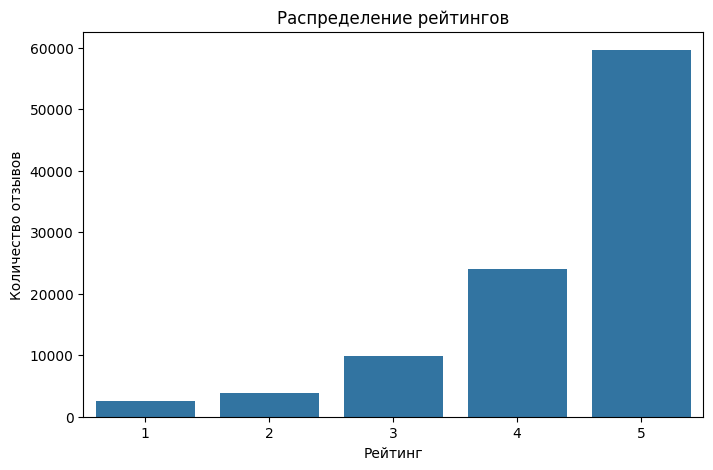

Рейтинг 1: 2599 отзывов (2.6%)
Рейтинг 2: 3881 отзывов (3.9%)
Рейтинг 3: 9848 отзывов (9.8%)
Рейтинг 4: 24033 отзывов (24.0%)
Рейтинг 5: 59639 отзывов (59.6%)


In [7]:
plt.figure(figsize=(8,5))
sns.countplot(x='rating', data=df_reviews)
plt.title("Распределение рейтингов")
plt.xlabel("Рейтинг")
plt.ylabel("Количество отзывов")
plt.show()

rating_dist = df_reviews['rating'].value_counts().sort_index()
for rating, count in rating_dist.items():
    print(f"Рейтинг {rating}: {count} отзывов ({count/len(df_reviews)*100:.1f}%)")

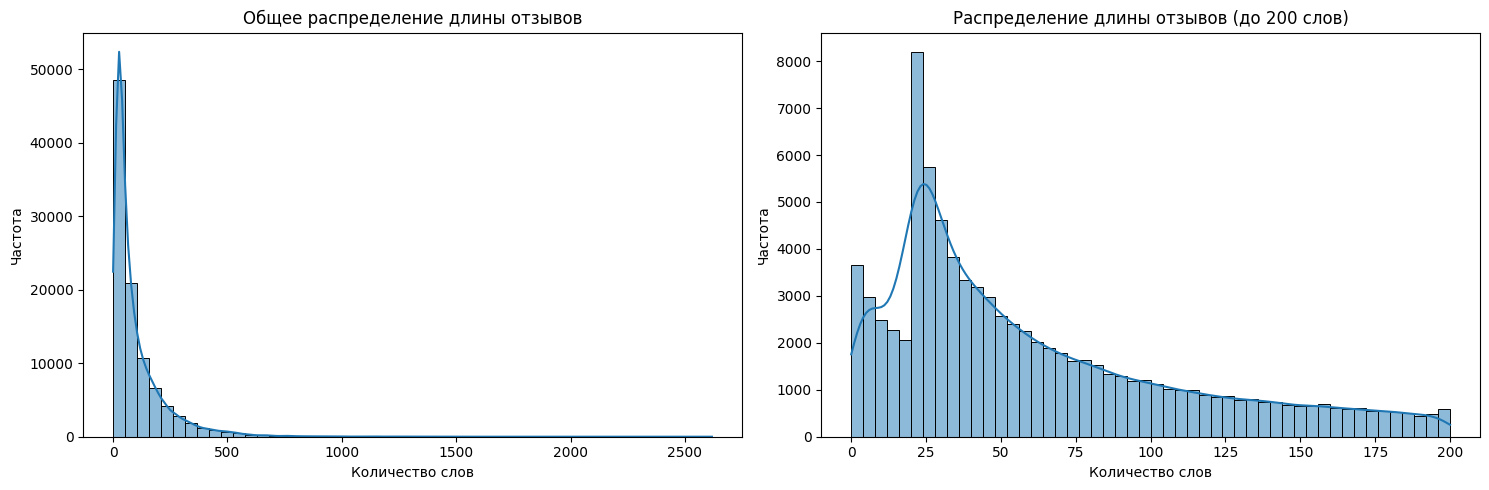


Процентили длины отзывов:
25-й процентиль: 26.0 слов
50-й процентиль: 55.0 слов
75-й процентиль: 129.0 слов
90-й процентиль: 246.0 слов
95-й процентиль: 345.0 слов
99-й процентиль: 590.0 слов


In [8]:
# Подсчет количества слов в каждом отзыве
df_reviews['text_length'] = (
    df_reviews['text'].str.split()
    # Считаем количество слов в каждом отзыве
    .str.len()
    # Если отзыв пустой (NaN) -> 0
    .fillna(0)
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

for ax, data, title in zip(
    [ax1, ax2],
    [df_reviews['text_length'], df_reviews[df_reviews['text_length'] <= 200]['text_length']],
    ["Общее распределение длины отзывов", "Распределение длины отзывов (до 200 слов)"]
):
    sns.histplot(data=data, bins=50, kde=True, ax=ax)
    ax.set_title(title)
    ax.set(xlabel="Количество слов", ylabel="Частота")

plt.tight_layout()
plt.show()

print("\nПроцентили длины отзывов:")
for p, val in df_reviews['text_length'].quantile([.25, .5, .75, .9, .95, .99]).items():
    print(f"{int(p*100)}-й процентиль: {val:.1f} слов")